In [ ]:
!pip install gcsfs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
gcs_file_path = '/content/drive/MyDrive/Yelp Dataset/yelp_dataset/yelp_academic_dataset_business.json'
df_business = pd.read_json(gcs_file_path, lines=True)
print(df_business.head())
print(f"df_business shape: {df_business.shape}")

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [ ]:
import pandas as pd

gcs_file_path = '/content/drive/MyDrive/Yelp Dataset/yelp_dataset/yelp_academic_dataset_review.json'
chunk_size = 100000
chunks = pd.read_json(gcs_file_path, lines=True, chunksize=chunk_size)
df_review = pd.concat(chunks, ignore_index=True)
print(f"df_review shape: {df_review.shape}")
print(df_review.head(10))

df_review shape: (6990280, 9)
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
5  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
6  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   
7  _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   
8  ZKvDG2sBvHVdF5oBNUOpAQ  wSTuiTk-sKNdcFyprzZAjg  B5XSoSG3SfvQGtKEGQ1tSQ   
9  pUycOfUwM8vqX7KjRRhUEA  59MxRhNVhU9MYndMkz0wtw  gebiRewfieSdtt17PTW6Zg   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0

In [ ]:
import pandas as pd

gcs_user_file_path = '/content/drive/MyDrive/Yelp Dataset/yelp_dataset/yelp_academic_dataset_user.json'
chunk_size = 100000
user_chunks = pd.read_json(gcs_user_file_path, lines=True, chunksize=chunk_size)
df_user = pd.concat(user_chunks, ignore_index=True)

print(f"df_user shape: {df_user.shape}")
print(df_user.head(10))

df_user shape: (1987897, 22)
                  user_id      name  review_count        yelping_since  \
0  qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26   
1  j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2  2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
3  SZDeASXq7o05mMNLshsdIA      Gwen           224  2005-11-29 04:38:33   
4  hA5lMy-EnncsH4JoR-hFGQ     Karen            79  2007-01-05 19:40:59   
5  q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
6  cxuxXkcihfCbqt5Byrup8Q       Rob            12  2009-02-24 03:09:06   
7  E9kcWJdJUHuTKfQurPljwA      Mike           358  2008-12-11 22:11:56   
8  lO1iq-f75hnPNZkTy3Zerg  Rachelle            40  2008-12-29 22:40:56   
9  AUi8MPWJ0mLkMfwbui27lg      John           109  2010-01-07 18:32:04   

   useful  funny   cool                                              elite  \
0    7217   1259   5994                                               2007   


###Run PC check, 22 PC seems a bit much, maybe considering appying PCA

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
features = df_user.select_dtypes(include=[np.number]).columns
df_numerical = df_user[features]
sc = StandardScaler()
df_scaled = sc.fit_transform(df_numerical)
from sklearn.decomposition import PCA
model = PCA()
model.fit(df_scaled)
transformed_data = model.transform(df_scaled)
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_df.columns = [f"PC{i+1}" for i in range(df_scaled.shape[1])]
transformed_data_df
print(transformed_data_df.head())

          PC1        PC2        PC3        PC4        PC5        PC6  \
0   22.629734  -9.298640   6.955020  -2.762271   2.164556   5.388846   
1  156.626783 -89.114143  62.336397 -25.721354  38.579724  95.484906   
2    6.007802  -4.193984   4.867027  -2.077819   2.864979  -0.854805   
3    1.720272  -1.345104   2.053181  -0.193083   0.976009   0.163276   
4    0.034934  -0.152681   0.361947  -0.200786   0.269741  -0.114228   

         PC7       PC8       PC9       PC10      PC11      PC12       PC13  \
0  -4.271162  0.047292 -1.992644  -0.921192  0.216205  0.353592  -5.894890   
1 -52.932770  3.551341 -7.051073  16.820696  2.872995 -2.858549 -19.645468   
2   2.477086  0.161297  0.479481  -0.542791 -0.155244 -0.200899   0.416735   
3   0.463771 -0.104337  0.308328  -0.013887 -0.130571 -0.112014   0.251404   
4   0.408328  0.085735  0.044673   0.023318 -0.001072  0.015595   0.072835   

       PC14      PC15      PC16          PC17  
0 -0.714758 -2.374570  0.438094 -1.385867e-15  
1 

In [ ]:
print(f"df_user shape: {df_user.shape}")

df_user shape: (1987897, 22)


###Based on this large dataset, we decided to run PCA before clustering. Also we can clearly see that there are some of the features that's unrelated to our data(such as user-id and time of the yelp). Some of the data might have correlation

In [ ]:
 model.explained_variance_

array([9.81090749e+00, 2.71924934e+00, 1.07181573e+00, 9.89633467e-01,
       7.10557898e-01, 5.14961910e-01, 3.94610309e-01, 2.51295117e-01,
       2.16927983e-01, 1.07004668e-01, 7.45463872e-02, 5.73381151e-02,
       3.90402916e-02, 2.44067786e-02, 1.49568943e-02, 2.75617476e-03,
       8.67361736e-19])

In [ ]:
!pip install psynlig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.9/455.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: 

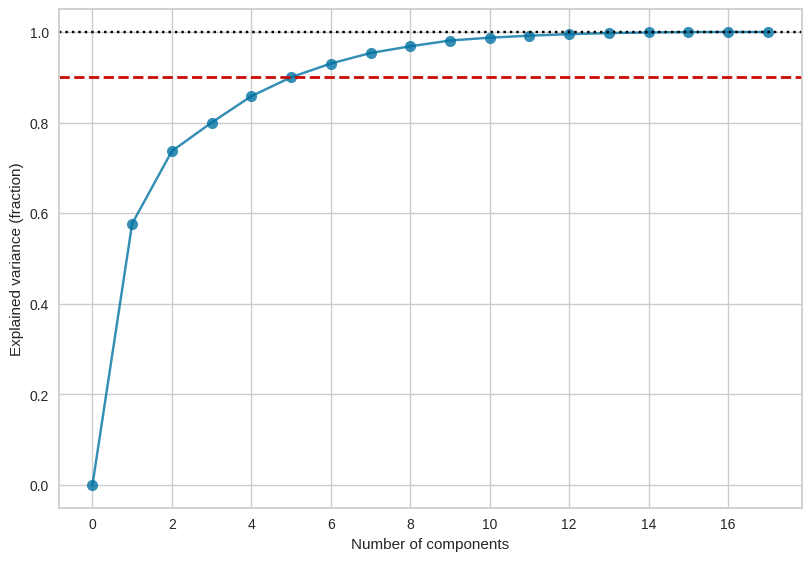

In [ ]:
from matplotlib import pyplot as plt #code from Dimensionality_Reduction_Hands_on.ipynb
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)
_, ax= pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)
ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2) #PCA check

In [ ]:
model = PCA(n_components = 6) #greater than 90%
df_pca = model.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca)
df_pca_df.columns = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,22.629734,-9.298640,6.955020,-2.762271,2.164556,5.388846
1,156.626783,-89.114143,62.336397,-25.721354,38.579724,95.484906
2,6.007802,-4.193984,4.867027,-2.077819,2.864979,-0.854805
3,1.720272,-1.345104,2.053181,-0.193083,0.976009,0.163276
4,0.034934,-0.152681,0.361947,-0.200786,0.269741,-0.114228
...,...,...,...,...,...,...
1987892,-0.108475,0.037561,0.396510,1.014504,-0.071427,-0.031981
1987893,-0.144967,0.114018,0.271768,1.127384,-0.175783,0.008455
1987894,-0.148287,0.138017,-0.657882,-1.223184,-0.004993,0.013016
1987895,-0.149413,0.134162,-0.354962,-0.437251,-0.066003,0.013914


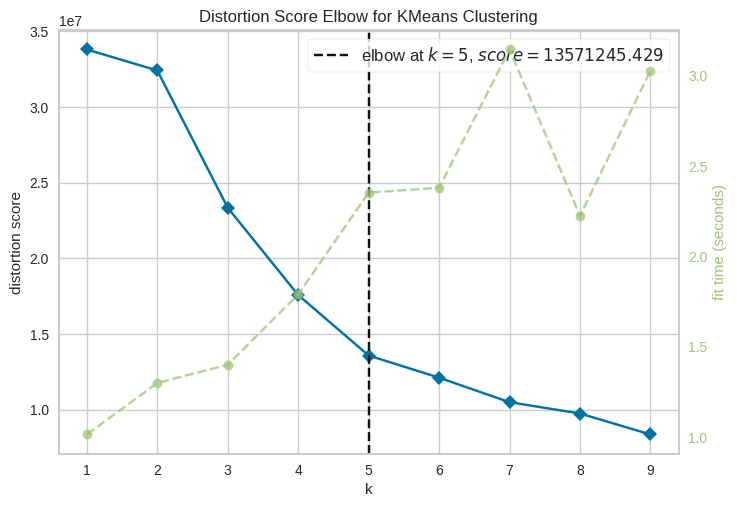

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
sc = StandardScaler()
df_scaled = sc.fit_transform(df_numerical)
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(df_scaled)
visualizer.show() #kmeans elbow

In [ ]:
kmeans_model = KMeans(n_clusters=4, random_state = 7)
kmeans_model.fit(df_scaled)
df_pca_df['cluster'] = kmeans_model.labels_
cluster_summary = df_pca_df.groupby('cluster').mean()
cluster_summary #

,PC1,PC2,PC3,PC4,PC5,PC6
cluster,,,,,,
0,-0.037499,0.010639,0.000501,-0.000024,-0.000548,-0.001401
1,400.335520,-40.033560,-54.868780,20.060608,-5.874679,-20.824618
2,1878.175718,1622.884968,430.660192,-157.719417,39.559832,-67.501872
3,72.924609,-27.986522,1.391353,-0.931404,1.754041,5.057023


In [ ]:
df_pca_df = df_pca_df.drop(columns=['cluster'], axis= 1)# remove the k-mean clusters just did

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
sc = StandardScaler()
df_scaled = sc.fit_transform(df_numerical)
from sklearn.metrics import silhouette_score

df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])
Z = linkage(df_scaled, 'ward')

for num_cluster in range(2, 10):
  print("# cluster = ", num_cluster)
  labels = fcluster(Z, num_cluster, criterion='maxclust')
  score = silhouette_score(df_scaled, labels)

  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)

Generated using GPT. Use sample_size. The original data set is too large resulting in memory crash. Link in Appendix

**Hierarchy**

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# Sample the data
sample_size = 10000
if df_scaled.shape[0] > sample_size:
    indices = np.random.choice(df_scaled.shape[0], sample_size, replace=False)
    df_sample = df_scaled[indices]
else:
    df_sample = df_scaled

Z = linkage(df_sample, method='ward')

# Calculate the Silhouette Score under different cluster numbers
df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])
for num_cluster in range(2, 10):
    print("# cluster = ", num_cluster)
    labels = fcluster(Z, num_cluster, criterion='maxclust')
    score = silhouette_score(df_sample, labels)
    df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]],
                                        columns=['num_clusters', 'silhouette_score'])],
                           ignore_index=True)
print(df_scores)

# cluster =  2


<ipython-input-17-4b3857463d72>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]],


# cluster =  3
# cluster =  4
# cluster =  5
# cluster =  6
# cluster =  7
# cluster =  8
# cluster =  9
  num_clusters  silhouette_score
0            2          0.986486
1            3          0.983454
2            4          0.478148
3            5          0.489903
4            6          0.524823
5            7          0.524903
6            8          0.503970
7            9          0.510155


**We found that the Ward method in Hire clustering works super good by returning a 0.97 silhouette score, which is much better than the result we have in k-means while this did not take too long to run. Thus, we will try to process the next step using this clustering.**

K_mean (trying to find the difference)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Create a DataFrame to store the Silhouette Score with different cluster numbers
df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])

# Calculate the Silhouette Score under different cluster numbers
for num_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels, sample_size=20000, random_state=42)

    df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]],
                                                     columns=['num_clusters', 'silhouette_score'])],
                           ignore_index=True)

    print(f"Number of clusters: {num_cluster}, Silhouette Score: {score:.4f}")

print("All results:")
print(df_scores)

<ipython-input-18-eb4d6afc4935>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]],


Number of clusters: 2, Silhouette Score: 0.4855
Number of clusters: 3, Silhouette Score: 0.4896
Number of clusters: 4, Silhouette Score: 0.4958
Number of clusters: 5, Silhouette Score: 0.4994
Number of clusters: 6, Silhouette Score: 0.5060
Number of clusters: 7, Silhouette Score: 0.5157
Number of clusters: 8, Silhouette Score: 0.5374
Number of clusters: 9, Silhouette Score: 0.5602
Number of clusters: 10, Silhouette Score: 0.5635
All results:
  num_clusters  silhouette_score
0            2          0.485494
1            3          0.489579
2            4          0.495797
3            5          0.499413
4            6          0.505983
5            7          0.515721
6            8          0.537436
7            9          0.560195
8           10          0.563474


**Seems like the there is a pattern that more clusters leads to higher silh score. However, this k-mean performs worse than hire, thus only if in the next step we found that more clusters is needed to perform this experiment or model, we will choose ward method instead of k-mean.**

<Axes: xlabel='num_clusters'>

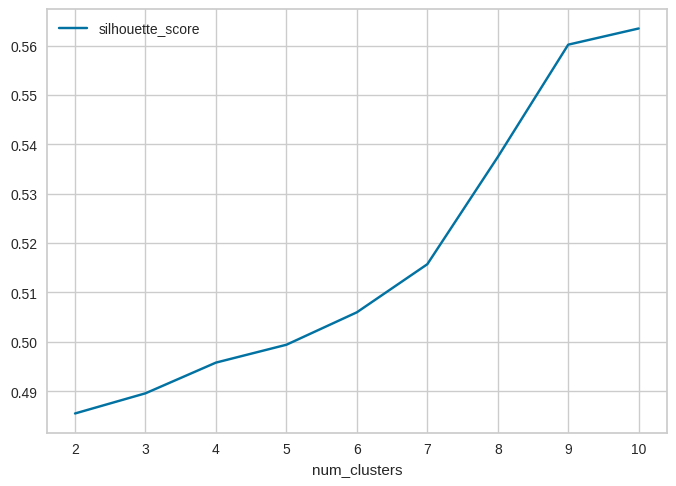

In [ ]:
df_scores.plot.line(x='num_clusters', y='silhouette_score') # check what might be the best # of clusters

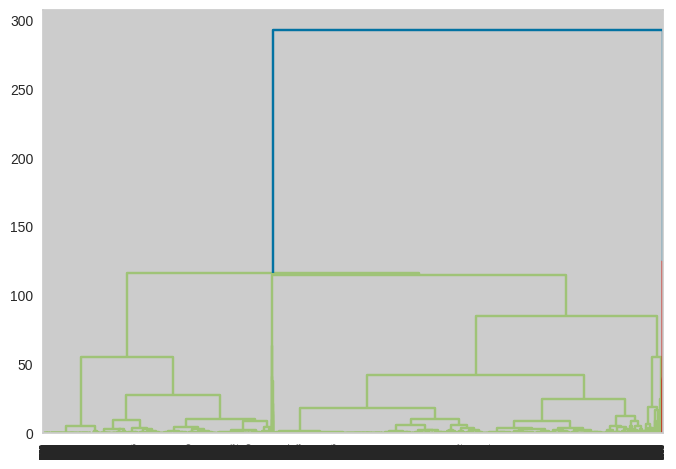

In [ ]:
from scipy.cluster.hierarchy import dendrogram

_ = dendrogram(Z) #ward

Using PCA to check outlier

In [ ]:
# Check if the column 'cluster' exists before attempting to drop it.
if 'cluster' in df_pca_df.columns:
    df_pca_df = df_pca_df.drop(columns=['cluster'], axis=1)
else:
    print("Column 'cluster' not found in DataFrame. Skipping drop operation.")

Column 'cluster' not found in DataFrame. Skipping drop operation.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
features = df_user.select_dtypes(include=[np.number]).columns
df_numerical = df_user[features]
sc = StandardScaler()
df_scaled = sc.fit_transform(df_numerical)
from sklearn.decomposition import PCA
model = PCA()
model.fit(df_scaled)
transformed_data = model.transform(df_scaled)
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_df.columns = [f"PC{i+1}" for i in range(df_scaled.shape[1])]
transformed_data_df
print(transformed_data_df.head())

          PC1        PC2        PC3        PC4        PC5        PC6  \
0   22.629734  -9.298640   6.955020  -2.762271   2.164556   5.388846   
1  156.626783 -89.114143  62.336397 -25.721354  38.579724  95.484906   
2    6.007802  -4.193984   4.867027  -2.077819   2.864979  -0.854805   
3    1.720272  -1.345104   2.053181  -0.193083   0.976009   0.163276   
4    0.034934  -0.152681   0.361947  -0.200786   0.269741  -0.114228   

         PC7       PC8       PC9       PC10      PC11      PC12       PC13  \
0  -4.271162  0.047292 -1.992644  -0.921192  0.216205  0.353592  -5.894890   
1 -52.932770  3.551341 -7.051073  16.820696  2.872995 -2.858549 -19.645468   
2   2.477086  0.161297  0.479481  -0.542791 -0.155244 -0.200899   0.416735   
3   0.463771 -0.104337  0.308328  -0.013887 -0.130571 -0.112014   0.251404   
4   0.408328  0.085735  0.044673   0.023318 -0.001072  0.015595   0.072835   

       PC14      PC15      PC16          PC17  
0 -0.714758 -2.374570  0.438094 -1.385867e-15  
1 

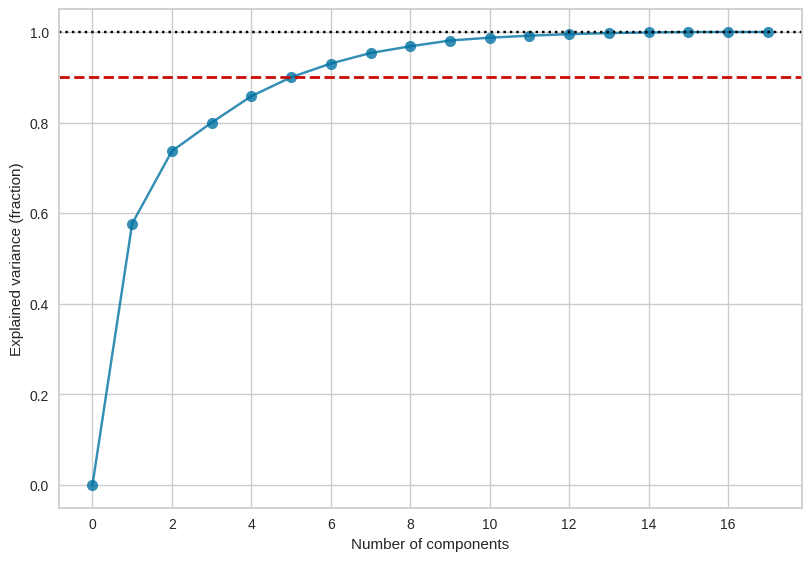

In [ ]:
from matplotlib import pyplot as plt #code from Dimensionality_Reduction_Hands_on.ipynb
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)
_, ax= pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)
ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2) #PCA check

In [ ]:
model = PCA(n_components = 6) #greater than 90%
df_pca = model.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca)
df_pca_df.columns = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,22.629734,-9.298640,6.955020,-2.762271,2.164556,5.388846
1,156.626783,-89.114143,62.336397,-25.721354,38.579724,95.484906
2,6.007802,-4.193984,4.867027,-2.077819,2.864979,-0.854805
3,1.720272,-1.345104,2.053181,-0.193083,0.976009,0.163276
4,0.034934,-0.152681,0.361947,-0.200786,0.269741,-0.114228
...,...,...,...,...,...,...
1987892,-0.108475,0.037561,0.396510,1.014504,-0.071427,-0.031981
1987893,-0.144967,0.114018,0.271768,1.127384,-0.175783,0.008455
1987894,-0.148287,0.138017,-0.657882,-1.223184,-0.004993,0.013016
1987895,-0.149413,0.134162,-0.354962,-0.437251,-0.066003,0.013914


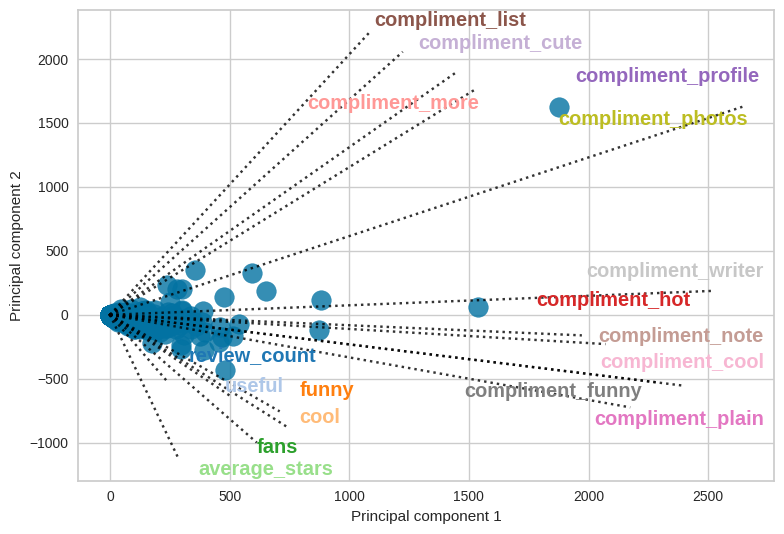

In [ ]:
from psynlig import pca_2d_scores #code from Dimensionality_Reduction_Hands_on.ipynb

loading_settings = {
    'adjust_text': True,
    'add_text': True,
}

pca_2d_scores(
    model,
    transformed_data,
    xvars=df_numerical.columns,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)



plt.show()